In [1]:
import random

import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import tengp
from gpbenchmarks import get_data


def pdivide(x, y):
    return np.divide(x, y, out=np.copy(x), where=x!=0)

def plog(x, y):
    return np.log(x, out=np.copy(x), where=x>0)

def psin(x, y):
    return np.sin(x)

def pcos(x, y):
    return np.cos(x)

def pow2(x, y):
    return x**2

def pow3(x, y):
    return x**3

def ptan(x, y):
    return np.tan(x)

def ptanh(x, y):
    return np.tanh(x)

def psqrt(x, y):
    return  np.sqrt(x)

def pexp(x, y):
    return np.exp(x)


funset = tengp.FunctionSet()
funset.add(np.add, 2)
funset.add(np.subtract, 2)
funset.add(np.multiply, 2)
funset.add(pdivide, 2)
funset.add(plog, 2)
funset.add(psin, 2)
funset.add(pcos, 2)

#     function set: +, -, *, /, sin, cos, tan, tanh, sqrt, exp, log, **2, **3
ext_funset = tengp.FunctionSet()
ext_funset.add(np.add, 2)
ext_funset.add(np.subtract, 2)
ext_funset.add(np.multiply, 2)
ext_funset.add(pdivide, 2)
ext_funset.add(psin, 2)
ext_funset.add(pcos, 2)
ext_funset.add(ptan, 2)
ext_funset.add(ptanh, 2)
ext_funset.add(psqrt, 2)
ext_funset.add(pexp, 2)
ext_funset.add(plog, 2)
ext_funset.add(pow2, 2)
ext_funset.add(pow3, 2)

params1d = tengp.Parameters(2, 1, 1, 100, funset, real_valued=True)
params2d = tengp.Parameters(3, 1, 1, 100, funset, real_valued=True)
params5d = tengp.Parameters(6, 1, 1, 100, ext_funset, real_valued=True)

functions = [('nguyenf4', params1d, [20, -1, 1]), ('nguyenf7', params1d, [20, 0, 2]), ('nguyenf10', params2d, [100, -1, 1]), ('korns12', params5d, [10000, -50, 50])]

In [2]:
import pygmo as pg

In [3]:
vectors = []
n_actives = []

class cost_function:
    def __init__(self, X, Y, params, bounds):
        self.params = params
        self.bounds = bounds
        self.X = X
        self.Y = Y
    
    def fitness(self, x):
        #vectors.append(x)
        
        individual = tengp.individual.NPIndividual(
            list(x), self.bounds, self.params
        )
        
        pred = individual.transform(self.X)
        
        #n_actives.append(len(individual.active_nodes))
        
        try:
            return [mean_squared_error(pred, y)]
        except ValueError:
            return [10000000000]
        
    def get_bounds(self):
        lower = [0]*len(self.bounds)
        lower[-1] = 10
        return (lower, [b for b in self.bounds])

In [5]:
%%time
results = []

for f in functions:
    print(f[0])
    x, y = get_data(f[0], *f[2])
    x = np.c_[np.ones(len(x)), x]
    bounds = tengp.individual.IndividualBuilder(f[1]).create().bounds[:]

    prob = pg.problem(cost_function(x, y, f[1], bounds))
    
    problem_results = []

    for i in range(100):
        print(i, end=', ')
        algo = pg.algorithm(pg.pso(gen=250))
        algo.set_verbosity(1)
        pop = pg.population(prob, 20)
        pop = algo.evolve(pop)
        problem_results.append(pop.champion_f[0])
    results.append(problem_results)
    

nguyenf4
0, 

/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sin
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in cos
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:99: RuntimeWarning: invalid value encountered in multiply
  L = (1-b)*x_l1 + b*x_u1
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: invalid value encountered in subtract
  u = a*f_u(L, U)
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/mnt/c/Use

1, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: invalid value encountered in multiply
  u = a*f_u(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:101: RuntimeWarning: invalid value encountered in subtract
  l = (1-a)*f_l(L, U)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:100: RuntimeWarning: invalid value encountered in add
  U = (1-c)*x_l2 + c*x_u2
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:99: RuntimeWarning: invalid value encountered in add
  L = (1-b)*x_l1 + b*x_u1
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:100: RuntimeWarning: invalid value encountered in multiply
  U = (1-c)*x_l2 + c*x_u2


2, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:125: RuntimeWarning: invalid value encountered in add
  value = (1-coeff)*self.nodes[lower].value + coeff*self.nodes[upper].value


3, 4, 5, 6, 7, 8, 9, 10, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:101: RuntimeWarning: invalid value encountered in add
  l = (1-a)*f_l(L, U)


11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, nguyenf7
0, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:101: RuntimeWarning: invalid value encountered in multiply
  l = (1-a)*f_l(L, U)


1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: invalid value encountered in add
  u = a*f_u(L, U)


22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, nguyenf10
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, korns12
0, 

/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in sqrt
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: overflow encountered in exp
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in tan
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in square
/home/jarino/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in power
/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:101: RuntimeWarning: overflow encountered in multiply
  l = (1-a)*f_l(L, U)


1, 

/home/jarino/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


2, 3, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:102: RuntimeWarning: overflow encountered in multiply
  u = a*f_u(L, U)


4, 5, 6, 7, 8, 

/mnt/c/Users/jarinov-notas/dev/tengp/tengp/individual.py:125: RuntimeWarning: overflow encountered in multiply
  value = (1-coeff)*self.nodes[lower].value + coeff*self.nodes[upper].value


9, 

/home/jarino/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, CPU times: user 2h 50min 8s, sys: 1min 8s, total: 2h 51min 16s
Wall time: 2h 51min 57s


In [6]:
def plot_results(outs):
    costs = np.array(outs)
    print('mean:', np.mean(costs))
    print('median:', np.median(costs))
    print('variance:',np.var(costs))
    print('min:', np.min(costs))
    sns.distplot(costs);

Nguyen4
mean: 0.1712940761908177
median: 0.04483234797046781
variance: 0.1416050299634821
min: 0.0015964294813541652


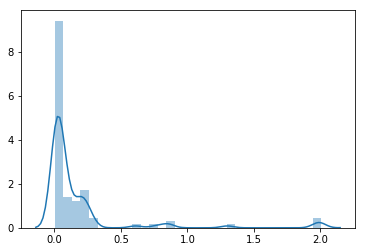

In [7]:
print('Nguyen4')
plot_results(results[0])

Nguyen4
mean: 0.10267269343736483
median: 0.04122928317963387
variance: 0.0260496922680274
min: 0.0015964294813541652


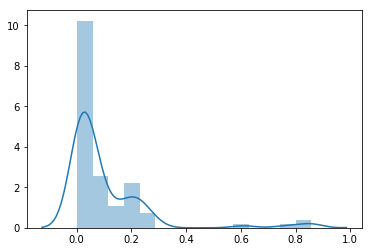

In [8]:
print('Nguyen4')
plot_results([x for x in results[0] if x < 1 ])

Nguyen7
mean: 0.015009693387063204
median: 0.0004495148431147049
variance: 0.009923273479032603
min: 1.4611356915102245e-05


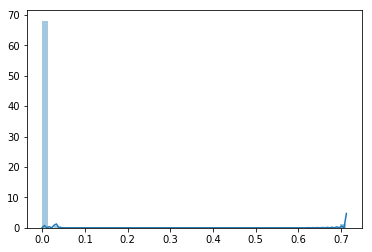

In [9]:
print('Nguyen7')
plot_results(results[1])

Nguyen10
mean: 0.01272823503223374
median: 0.008729557663272417
variance: 0.000177180883085986
min: 2.0045438620267235e-05


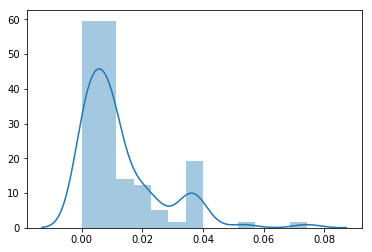

In [10]:
print('Nguyen10')
plot_results(results[2])

Korns12
mean: 1.3237701919851244
median: 1.4163444633605615
variance: 0.05188725228615758
min: 0.637990997182925


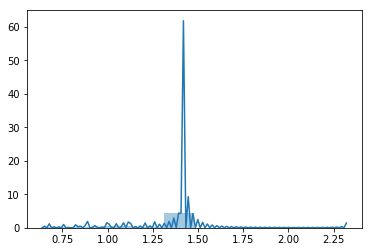

In [11]:
print('Korns12')
plot_results(results[3])

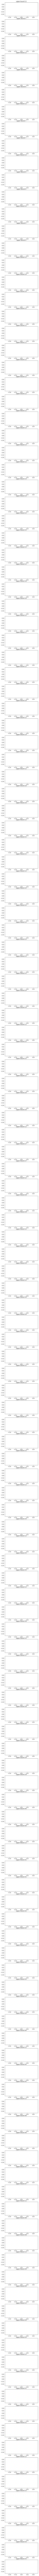

In [11]:
fig, axs = plt.subplots(151, 1, figsize=(5,(15/7)*151))
fig.tight_layout()

for index, (bound, ax) in enumerate(zip(bounds, axs)):
    
    y = [round(x[index], 2) for x in vectors]
    x = list(range(len(y)))
    ax.scatter(x, y)
    ax.set_title(f'upper bound {bound}')

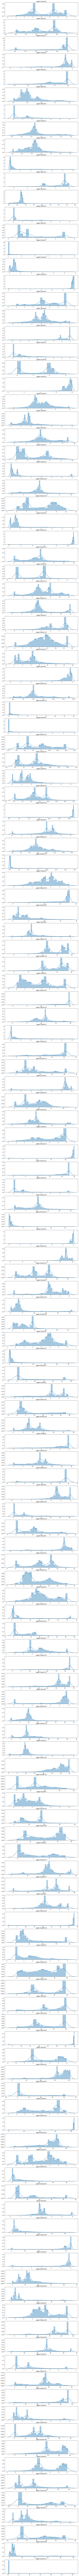

In [57]:
fig, axs = plt.subplots(151, 1, figsize=(10,(15/7)*151))
fig.tight_layout()

for index, (bound, ax) in enumerate(zip(bounds, axs)):
    sns.distplot([round(x[index], 2) for x in vectors], ax=ax)
    ax.set_title(f'upper bound {bound}')